In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [25]:
# 看模型各指標表現
def get_model_performance(y_test, y_pred):
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import confusion_matrix
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
    print('accuracy:', accuracy)
    print('f1:', f1)
    print('auc:', auc)
    print(report)
    print(cm)

In [26]:
df = pd.read_csv('/Users/joelin/Downloads/final_data.csv')
df.columns

Index(['userid', 'gender_2.0', 'is_seller_1', 'age_segment_0-25',
       'age_segment_25-35', 'age_segment_35-45', 'is_birth_year',
       'enroll_days', 'login_time_std', '1_month_average_login_time',
       '3_month_average_login_time', '6_month_average_login_time',
       '1_month_login_frequency', '3_month_login_frequency', '2020-03',
       '2020-04', '2020-05', '2020-06', '2020-07', 'total_r_score',
       'total_f_score', 'total_m_score', 'max_login_times', 'min_login_times',
       'median_login_times', 'average_purchase_amount', 'max_purchase_amount',
       'min_purchase_amount', 'median_purchase_amount', 'std_purchase_amount',
       'average_MoM'],
      dtype='object')

In [27]:
user_train = pd.read_csv('/Users/joelin/Downloads/台灣大學_商業智慧與數據分析企業實作_安永_備選題目/user_train.csv')
user_train.head()

,userid,label
0,243381,0
1,150139,1
2,305902,1
3,159981,0
4,490632,0


In [28]:
# merge user_train and df
df = pd.merge(df, user_train, on='userid', how='inner')
df.head()

,userid,gender_2.0,is_seller_1,age_segment_0-25,age_segment_25-35,age_segment_35-45,is_birth_year,enroll_days,login_time_std,1_month_average_login_time,...,max_login_times,min_login_times,median_login_times,average_purchase_amount,max_purchase_amount,min_purchase_amount,median_purchase_amount,std_purchase_amount,average_MoM,label
0,1,True,True,False,True,False,1,1892,0.631860,0.483871,...,4,1,1.0,24.600000,150,1,10.0,44.962206,1.313793,0
1,2,False,True,False,False,True,1,1892,1.179647,2.580645,...,6,1,3.0,3.277778,10,1,1.5,2.926664,0.180263,0
2,3,True,True,True,False,False,1,1892,1.212977,4.548387,...,8,2,4.0,2.000000,4,1,2.0,1.000000,0.166667,0
3,4,False,True,False,False,True,1,1892,1.048227,2.290323,...,5,1,2.0,2.342857,10,1,1.0,2.235316,0.293590,0
4,5,False,True,False,False,True,1,1892,1.336613,4.032258,...,10,2,4.0,42.061538,1934,1,1.0,245.887416,19.803367,1


In [29]:
# 切分資料
from sklearn.model_selection import train_test_split

X = df.drop(['userid','label'], axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 儲存切分好的資料
with open('/Users/joelin/Downloads/台灣大學_商業智慧與數據分析企業實作_安永_備選題目/X_train.pickle', 'wb') as f:
    pickle.dump(X_train, f)

with open('/Users/joelin/Downloads/台灣大學_商業智慧與數據分析企業實作_安永_備選題目/X_test.pickle', 'wb') as f:
    pickle.dump(X_test, f)

with open('/Users/joelin/Downloads/台灣大學_商業智慧與數據分析企業實作_安永_備選題目/y_train.pickle', 'wb') as f:
    pickle.dump(y_train, f)

with open('/Users/joelin/Downloads/台灣大學_商業智慧與數據分析企業實作_安永_備選題目/y_test.pickle', 'wb') as f:
    pickle.dump(y_test, f)

In [30]:
# 匯入切分好的資料
with open('/Users/joelin/Downloads/台灣大學_商業智慧與數據分析企業實作_安永_備選題目/X_train.pickle', 'rb') as f:
    X_train = pickle.load(f)

with open('/Users/joelin/Downloads/台灣大學_商業智慧與數據分析企業實作_安永_備選題目/X_test.pickle', 'rb') as f:
    X_test = pickle.load(f)
    
with open('/Users/joelin/Downloads/台灣大學_商業智慧與數據分析企業實作_安永_備選題目/y_train.pickle', 'rb') as f:
    y_train = pickle.load(f)

with open('/Users/joelin/Downloads/台灣大學_商業智慧與數據分析企業實作_安永_備選題目/y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)

In [31]:
X_train.columns

Index(['gender_2.0', 'is_seller_1', 'age_segment_0-25', 'age_segment_25-35',
       'age_segment_35-45', 'is_birth_year', 'enroll_days', 'login_time_std',
       '1_month_average_login_time', '3_month_average_login_time',
       '6_month_average_login_time', '1_month_login_frequency',
       '3_month_login_frequency', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', 'total_r_score', 'total_f_score', 'total_m_score',
       'max_login_times', 'min_login_times', 'median_login_times',
       'average_purchase_amount', 'max_purchase_amount', 'min_purchase_amount',
       'median_purchase_amount', 'std_purchase_amount', 'average_MoM'],
      dtype='object')

In [32]:
print(len(X_train.columns))

30


In [33]:
# # XGBClassifier
# from xgboost import XGBClassifier

# xgb = XGBClassifier()
# xgb.fit(X_train, y_train)
# y_pred = xgb.predict(X_test)
# y_test = y_test.astype(int)
# y_pred = y_pred.astype(int)

# get_model_performance(y_test, y_pred)

In [34]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6],
    # Add more parameters here as needed
}

# Initialize the XGBClassifier
xgb = XGBClassifier()

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='roc_auc')

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Fit the model with the best parameters
xgb_best = XGBClassifier(**best_params)
xgb_best.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = xgb_best.predict(X_test)
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)
get_model_performance(y_test, y_pred)

accuracy: 0.6914503661672411
f1: 0.6580851382878885
auc: 0.5974149595785688
              precision    recall  f1-score   support

           0       0.71      0.89      0.79     84215
           1       0.60      0.30      0.40     43732

    accuracy                           0.69    127947
   macro avg       0.65      0.60      0.60    127947
weighted avg       0.67      0.69      0.66    127947

[[13129 30603]
 [ 8875 75340]]


In [41]:
# 儲存模型
with open('/Users/joelin/Downloads/台灣大學_商業智慧與數據分析企業實作_安永_備選題目/xgb_remove_product_RFM.pickle', 'wb') as f:
    pickle.dump(xgb_best, f)

In [42]:
# 匯入模型
with open('/Users/joelin/Downloads/台灣大學_商業智慧與數據分析企業實作_安永_備選題目/xgb_remove_product_RFM.pickle', 'rb') as f:
    xgb = pickle.load(f)

In [43]:
# 預測分類
y_pred = xgb.predict(X_test)
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)

get_model_performance(y_test, y_pred)


accuracy: 0.6914503661672411
f1: 0.6580851382878885
auc: 0.5974149595785688
              precision    recall  f1-score   support

           0       0.71      0.89      0.79     84215
           1       0.60      0.30      0.40     43732

    accuracy                           0.69    127947
   macro avg       0.65      0.60      0.60    127947
weighted avg       0.67      0.69      0.66    127947

[[13129 30603]
 [ 8875 75340]]


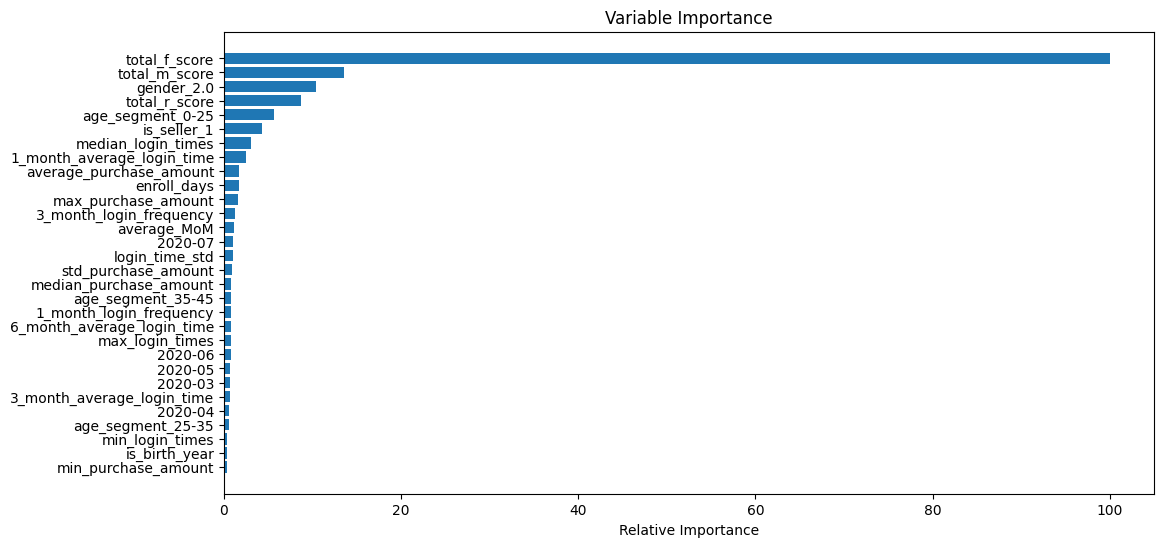

In [44]:
# 繪製特徵重要性要排序
feature_importance = xgb.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()






AttributeError: module 'matplotlib.colors' has no attribute 'ScalarMappable'

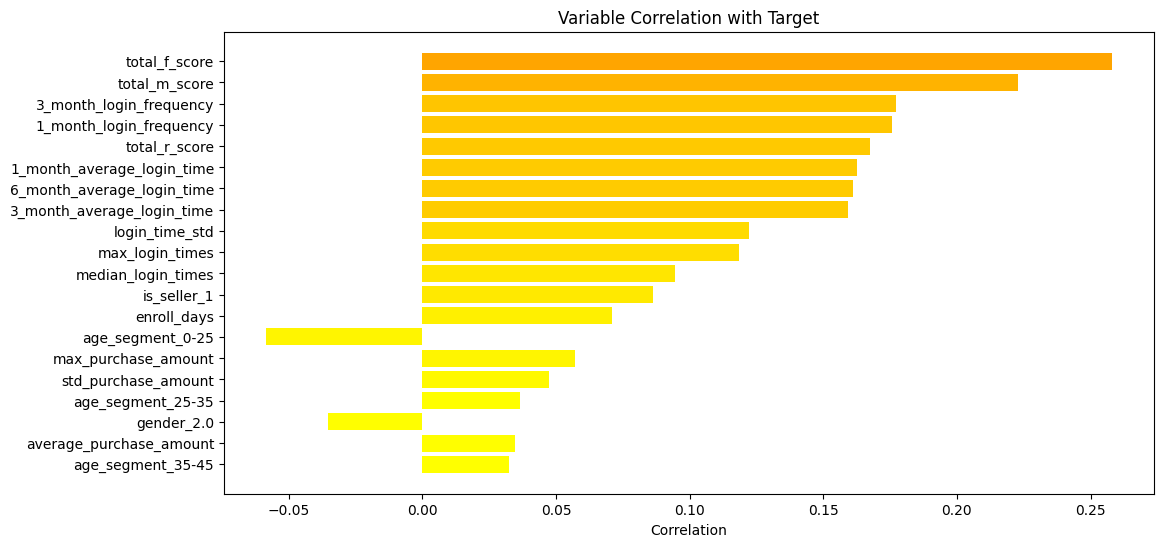

In [45]:
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

correlation = []
for i in range(len(X_train.columns)):
    correlation.append(pearsonr(X_train.iloc[:, i], y_train)[0])

correlation = np.array(correlation)

# Sort by the absolute values of the correlations
sorted_idx = np.argsort(np.abs(correlation))

# Select the indices for the top 20 features
top_20_idx = sorted_idx[-20:]

# Create a custom color map
cmap = mcolors.LinearSegmentedColormap.from_list("mycmap", ['yellow', 'orange'])

# Normalize the absolute values of the correlations
norm = mcolors.Normalize(vmin=np.abs(correlation[top_20_idx]).min(), vmax=np.abs(correlation[top_20_idx]).max())

pos = np.arange(top_20_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))

# Use barh and set color according to the absolute correlation
plt.barh(pos, correlation[top_20_idx], align='center', color=cmap(norm(np.abs(correlation[top_20_idx]))))

plt.yticks(pos, X_train.columns[top_20_idx])
plt.xlabel('Correlation')
plt.title('Variable Correlation with Target')
plt.colorbar(mcolors.ScalarMappable(norm=norm, cmap=cmap), label='Absolute Correlation')
plt.show()

AttributeError: module 'matplotlib.colors' has no attribute 'ScalarMappable'

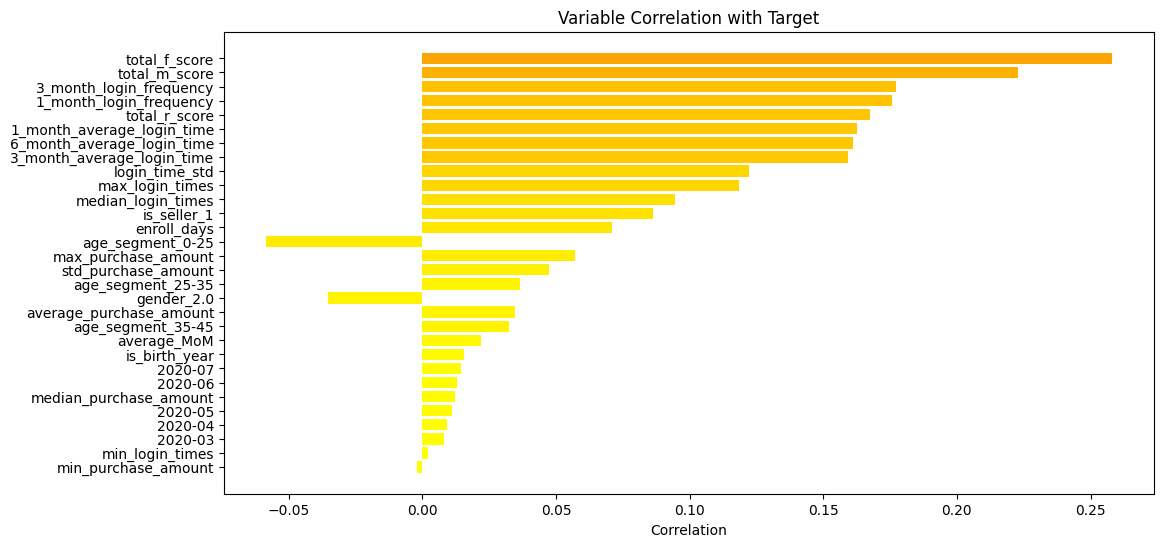

In [46]:
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

correlation = []
for i in range(len(X_train.columns)):
    correlation.append(pearsonr(X_train.iloc[:, i], y_train)[0])

correlation = np.array(correlation)

# Sort by the absolute values of the correlations
sorted_idx = np.argsort(np.abs(correlation))

# Create a custom color map
cmap = mcolors.LinearSegmentedColormap.from_list("mycmap", ['yellow', 'orange'])

# Normalize the absolute values of the correlations
norm = mcolors.Normalize(vmin=np.abs(correlation).min(), vmax=np.abs(correlation).max())

pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))

# Use barh and set color according to the absolute correlation
plt.barh(pos, correlation[sorted_idx], align='center', color=cmap(norm(np.abs(correlation[sorted_idx]))))

plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Correlation')
plt.title('Variable Correlation with Target')
plt.colorbar(mcolors.ScalarMappable(norm=norm, cmap=cmap), label='Absolute Correlation')
plt.show()

(127947, 30)


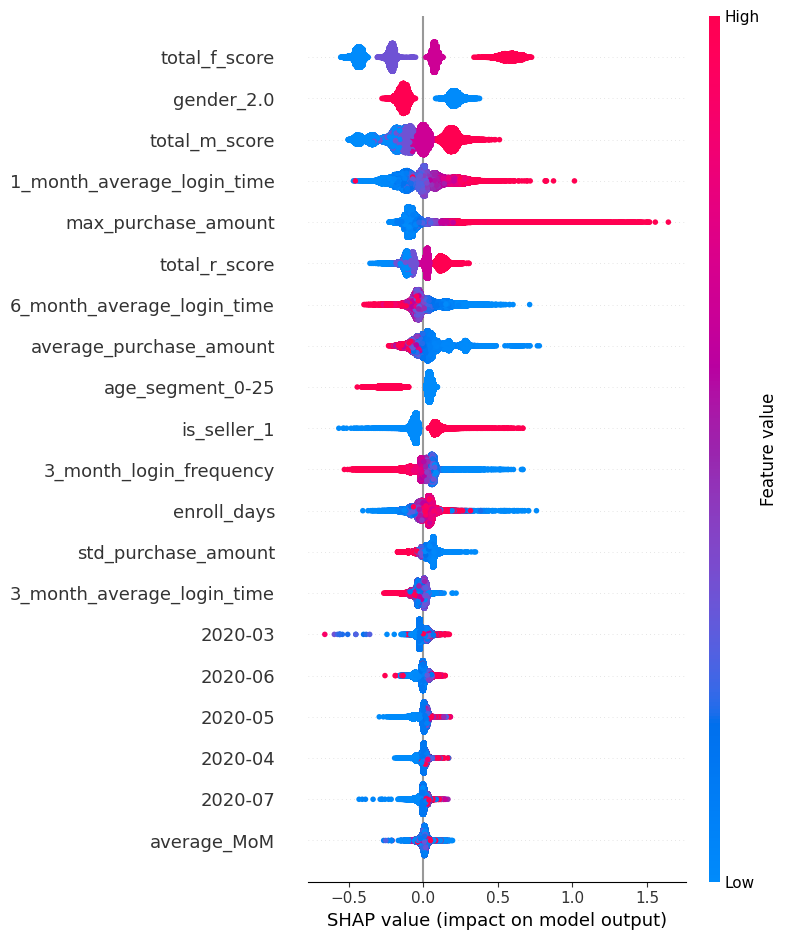

In [47]:
import shap

shap.initjs()
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
print(shap_values.shape)

# Compute SHAP values for the negative class (class 0)
shap_values_class0 = explainer.shap_values(X_test, y=0)

# Compute SHAP values for the positive class (class 1)
shap_values_class1 = explainer.shap_values(X_test, y=1)

# Plot SHAP values
shap.summary_plot(shap_values_class1, X_test)

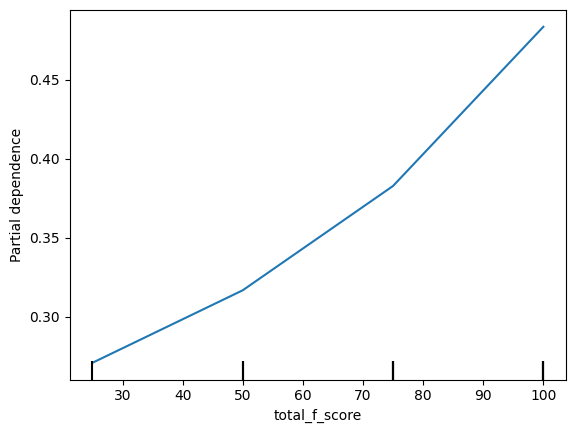

In [48]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay

# 假设你已经有了一个训练好的模型 `model`，一份数据 `X`，和对应的标签 `y`
# 我们想要查看特征 'feature_name' 对预测结果的影响
feature_name = 'total_f_score'
features = [feature_name]

# 从测试数据集中筛选出标签为1的样本
X_test_positive = X_test[y_test == 1]

# 计算部分依赖
pdp_result = partial_dependence(xgb, X_test_positive, features)

# 创建部分依赖图
display = PartialDependenceDisplay.from_estimator(xgb, X_test_positive, features)

In [ ]:
data = pd.read_csv('/Users/joelin/Downloads/final_data.csv')
data.head()

,userid,gender_2.0,is_seller_1,age_segment_0-25,age_segment_25-35,age_segment_35-45,is_birth_year,enroll_days,6_month_average_login_time,3_month_average_login_time,...,20_m_score,21_r_score,21_f_score,21_m_score,23_r_score,23_f_score,23_m_score,total_r_score,total_f_score,total_m_score
0,1,True,True,False,True,False,1,1892,0.274725,0.326087,...,0,0,0,0,0,0,0,100,50,100
1,2,False,True,False,False,True,1,1892,2.675824,2.695652,...,25,0,0,0,0,0,0,100,75,75
2,3,True,True,True,False,False,1,1892,4.230769,4.228261,...,0,0,0,0,0,0,0,25,50,25
3,4,False,True,False,False,True,1,1892,2.340659,2.260870,...,0,0,0,0,75,50,75,75,100,75
4,5,False,True,False,False,True,1,1892,4.527473,4.358696,...,0,0,0,0,0,0,0,75,100,100


In [ ]:
user_train = pd.read_csv('/Users/joelin/Downloads/台灣大學_商業智慧與數據分析企業實作_安永_備選題目/user_train.csv')

# merge data
data = data.merge(user_train, how='inner', on='userid')
data.head()


,userid,gender_2.0,is_seller_1,age_segment_0-25,age_segment_25-35,age_segment_35-45,is_birth_year,enroll_days,6_month_average_login_time,3_month_average_login_time,...,21_r_score,21_f_score,21_m_score,23_r_score,23_f_score,23_m_score,total_r_score,total_f_score,total_m_score,label
0,1,True,True,False,True,False,1,1892,0.274725,0.326087,...,0,0,0,0,0,0,100,50,100,0
1,2,False,True,False,False,True,1,1892,2.675824,2.695652,...,0,0,0,0,0,0,100,75,75,0
2,3,True,True,True,False,False,1,1892,4.230769,4.228261,...,0,0,0,0,0,0,25,50,25,0
3,4,False,True,False,False,True,1,1892,2.340659,2.260870,...,0,0,0,75,50,75,75,100,75,0
4,5,False,True,False,False,True,1,1892,4.527473,4.358696,...,0,0,0,0,0,0,75,100,100,1


In [ ]:
male = data[data['gender_2.0']  == 0]
female = data[data['gender_2.0']  == 1]

male['total_m_score'].mean()

56.10801172386032

In [ ]:
seller = data[data['is_seller_1'] == 1]
non_seller = data[data['is_seller_1'] == 0]

seller['1_month_average_login_time'].mean()

1.0661162728468365

In [ ]:
non_seller['1_month_average_login_time'].mean()

0.7347778954695252

In [ ]:
# 觀察高價值客戶的平均登入時長 6_month_average_login_time
high_value = data[data['label'] == 1]

high_value['1_month_average_login_time'].mean()

1.0092507949279514

In [ ]:
# 觀察高價值客戶的平均登入時長 6_month_average_login_time
high_value = data[data['label'] == 0]

high_value['1_month_average_login_time'].mean()

0.7765145717241947